In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

# Resolve project root safely
BASE_DIR = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()

# Define paths
PROCESSED_DIR = BASE_DIR / "data" / "processed"
RAW_DATA_PATH = BASE_DIR / "data" / "creditcard.csv"

FEATURES_PATH = PROCESSED_DIR / "features.parquet"

# Load data
X = pd.read_parquet(FEATURES_PATH)
y = pd.read_csv(RAW_DATA_PATH, usecols=["is_fraud"])["is_fraud"]


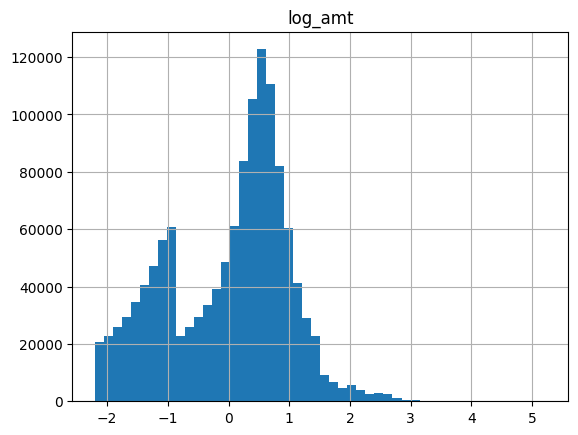

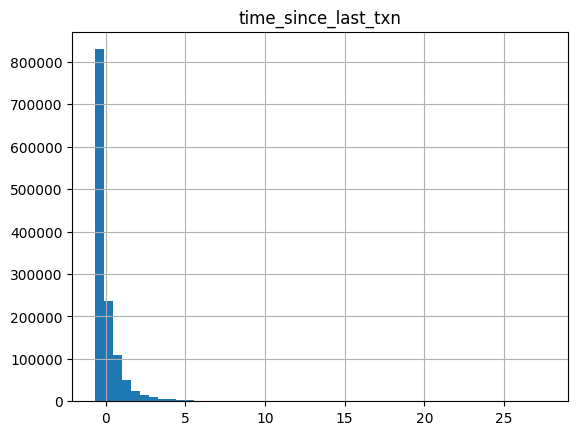

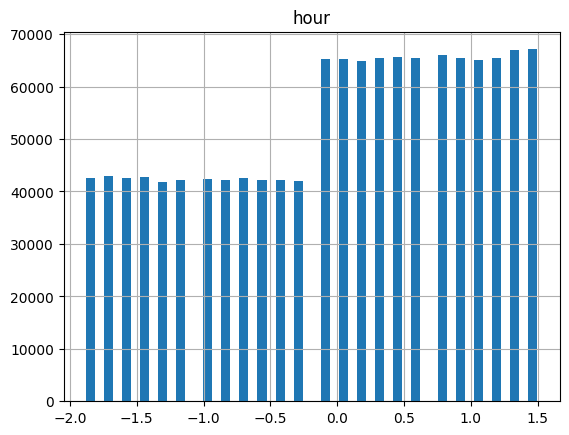

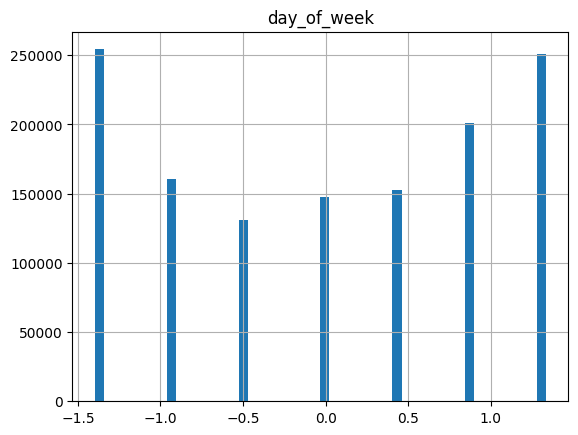

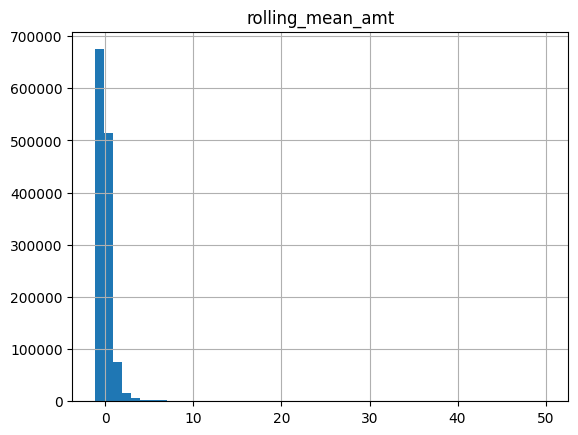

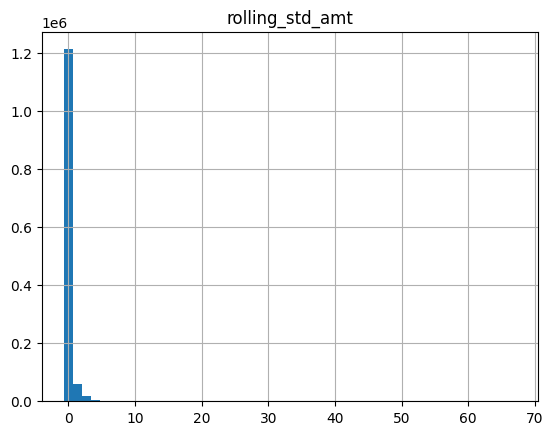

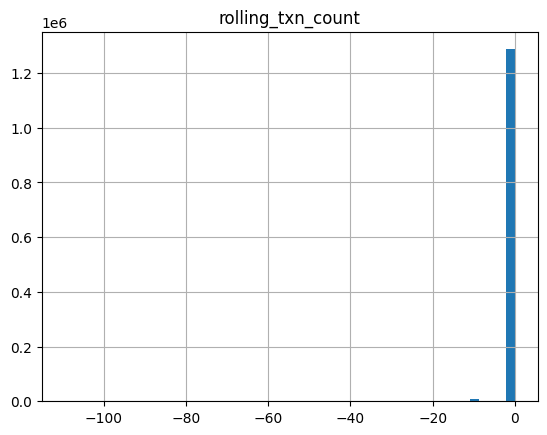

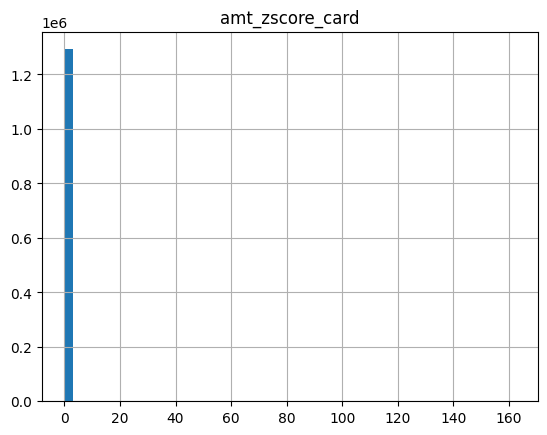

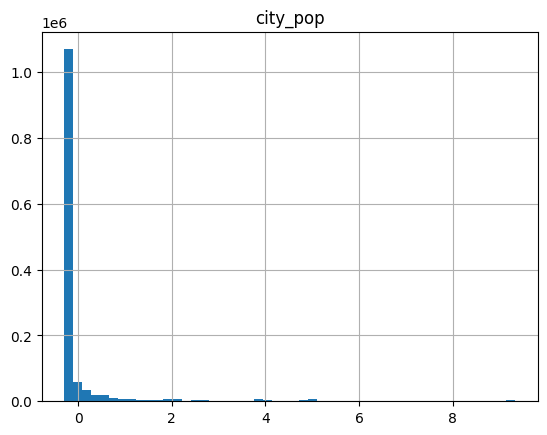

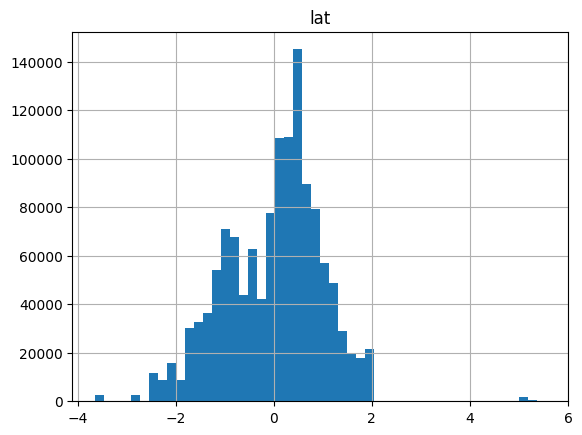

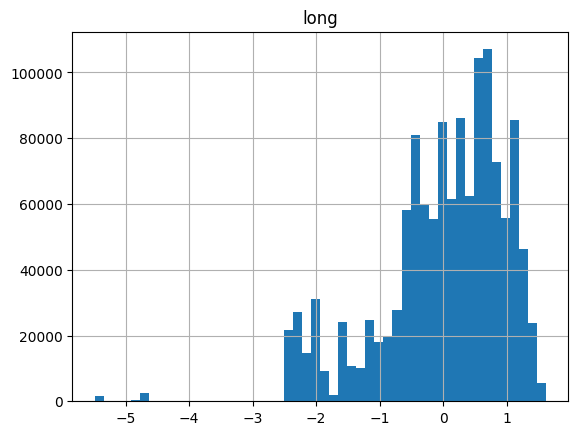

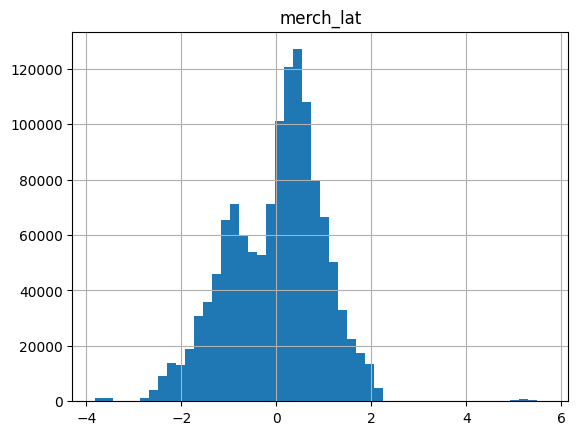

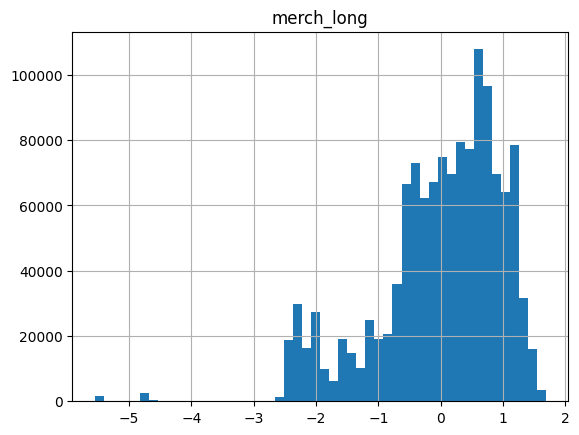

In [3]:
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure()
    X[col].hist(bins=50)
    plt.title(col)
    plt.show()


In [4]:
import pandas as pd

leakage_df = pd.concat([X, y], axis=1)
leakage_df.corr()["is_fraud"].sort_values(ascending=False)


is_fraud               1.000000
lat                    0.003019
merch_lat              0.002933
city_pop               0.001993
hour                   0.001834
rolling_mean_amt       0.000414
long                   0.000381
merch_long             0.000367
rolling_txn_count      0.000153
day_of_week            0.000005
log_amt               -0.000422
rolling_std_amt       -0.000489
amt_zscore_card       -0.000687
time_since_last_txn   -0.003299
Name: is_fraud, dtype: float64

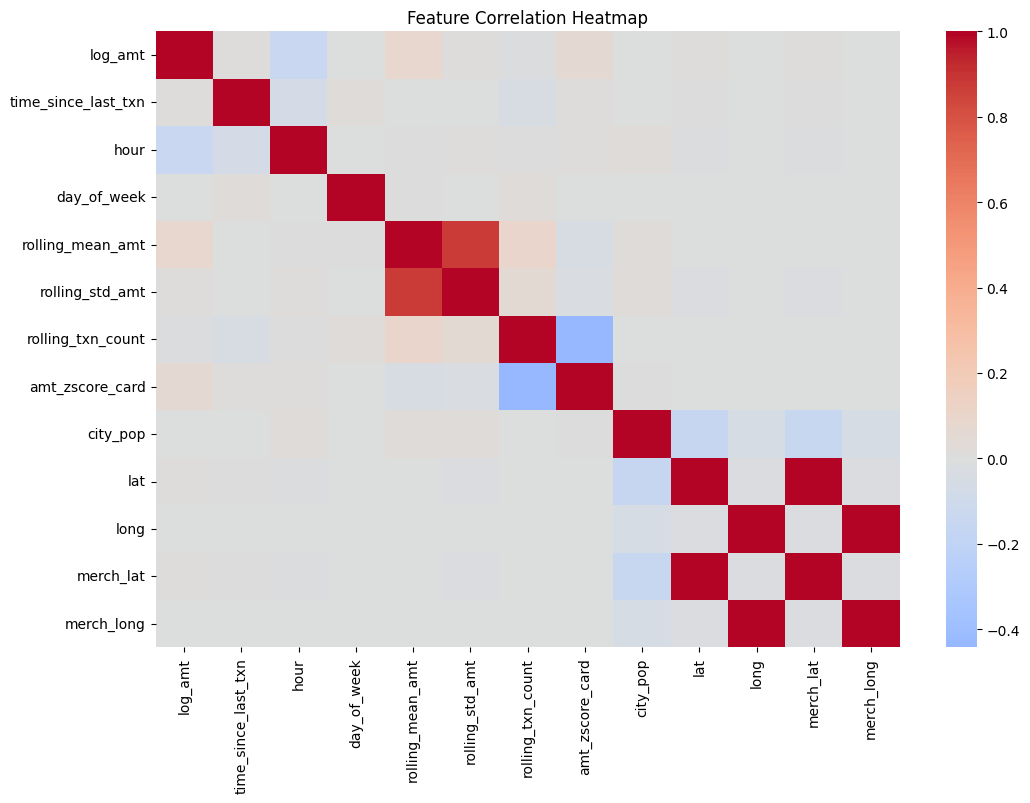

In [6]:
import seaborn as sns

corr = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


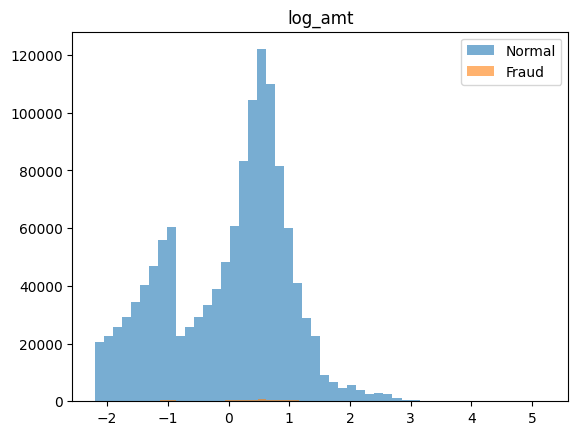

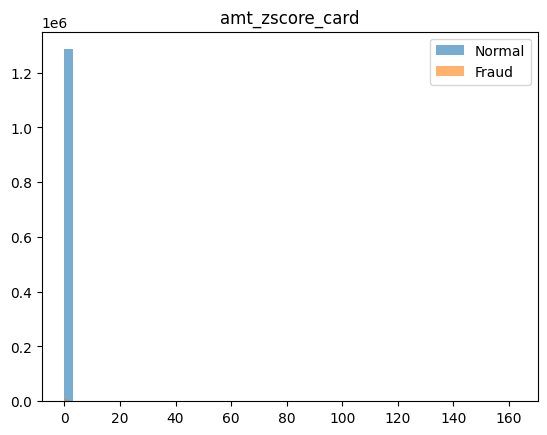

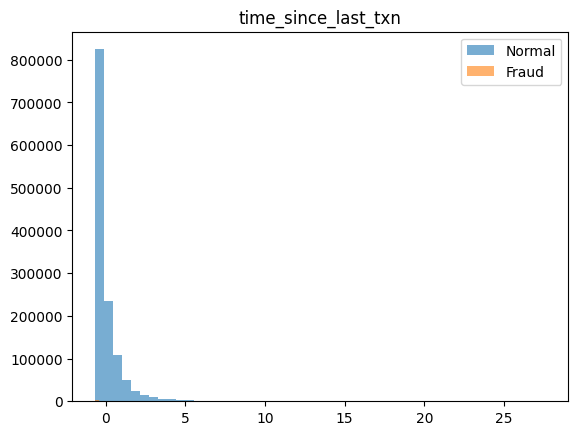

In [7]:
import matplotlib.pyplot as plt

fraud_idx = y == 1
normal_idx = y == 0

for col in ["log_amt", "amt_zscore_card", "time_since_last_txn"]:
    plt.figure()
    plt.hist(X.loc[normal_idx, col], bins=50, alpha=0.6, label="Normal")
    plt.hist(X.loc[fraud_idx, col], bins=50, alpha=0.6, label="Fraud")
    plt.title(col)
    plt.legend()
    plt.show()
